In [179]:
import pandas as pd
data_df = pd.read_csv("D:\AMRIT\PGCBAMD\courses\Marketing Analytics\Ecommerce Customers.csv")
data_df.head(n=2)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933


In [180]:
data_df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

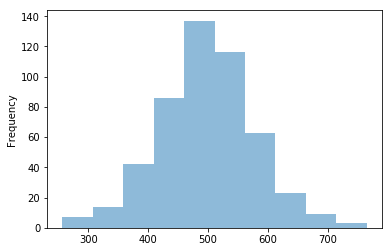

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data_df['Yearly Amount Spent'].plot.hist(alpha=0.5)

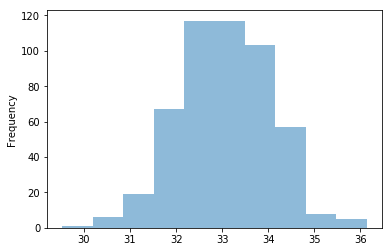

In [182]:
data_df['Avg. Session Length'].plot.hist(alpha=0.5)

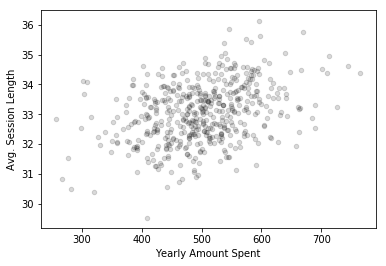

In [183]:
data_df.plot.scatter(x='Yearly Amount Spent', y='Avg. Session Length', c='k', alpha=.15)


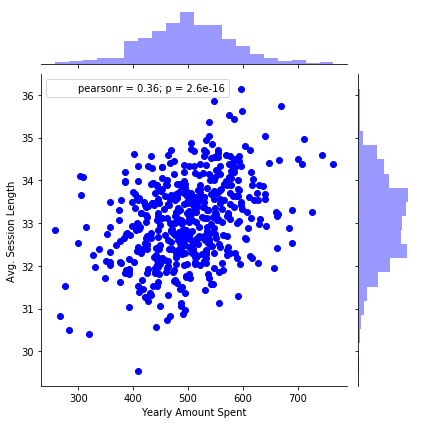

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.jointplot(x="Yearly Amount Spent",y="Avg. Session Length",data=data_df,color="blue")

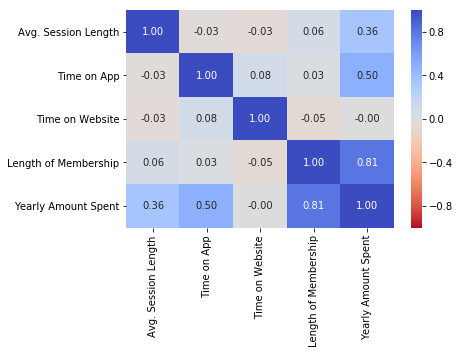

In [184]:
ax = sns.heatmap(data_df[["Email","Address","Avatar","Avg. Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent"]].corr(), cmap="coolwarm_r",vmin=-1,vmax=1,annot=True, fmt=".2f")

In [185]:
from sklearn import linear_model

In [186]:
data_df.shape

(500, 8)

In [187]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [188]:
a=data_df.isna()
a.head(n=5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [189]:
data_df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [190]:
import pandas as pd
X= data_df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]

y = data_df[['Yearly Amount Spent']]

In [191]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import pandas
import numpy

In [192]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [193]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression(normalize=True)
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [194]:
pred_train = regression_model.predict(X_train)
pred_test = regression_model.predict(X_test)

In [204]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Avg. Session Length is 25.936363150604866
The coefficient for Time on App is 38.923623658898954
The coefficient for Time on Website is 0.2266156836333491
The coefficient for Length of Membership is 61.40982708081968


In [205]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1052.195774930474


In [206]:
regression_model.score(X_test, y_test)

0.9882830396242543

In [211]:
from sklearn.metrics import mean_squared_error

y_predict = regression_model.predict(X_test)
########################################################

In [212]:
regression_model_mse = mean_squared_error(y_predict, y_test)

regression_model_mse

82.48763522059588

In [213]:
import math

math.sqrt(regression_model_mse)

9.082270378082557

In [214]:
##test data
regression_model.predict([[4, 121, 110,20]])

array([[5014.43240721]])

In [215]:
#y_pred = regression_model.predict(X_test)

Text(0,0.5,'Residuals')

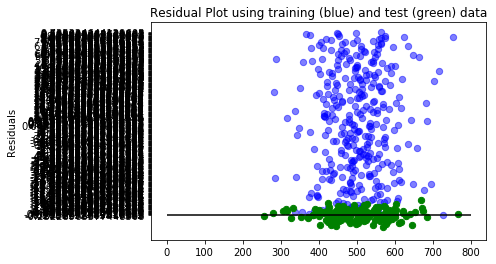

In [216]:
plt.scatter(regression_model.predict(X_train),regression_model.predict(X_train) - y_train, c = 'b',s=40,alpha=0.5)
plt.scatter(regression_model.predict(X_test), regression_model.predict(X_test) - y_test, c='g' , s=40)
plt.hlines(y = 0,xmin=0,xmax=800)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')